In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

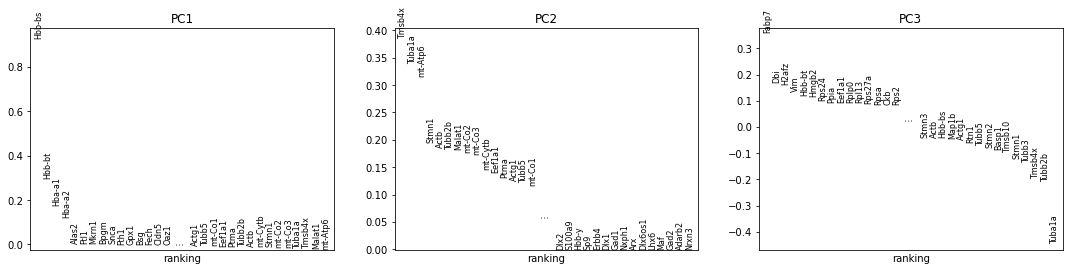

In [3]:
# PCA before filtering
sc.tl.pca(adata, n_comps=50)
sc.pl.pca_loadings(adata)

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


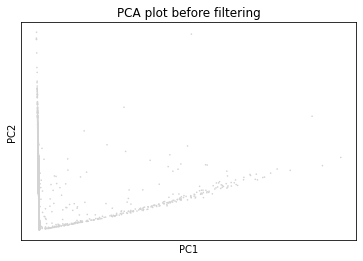

In [4]:
sc.pl.pca(adata,title='PCA plot before filtering',save='PCA_before_filtering.png')


# Step 1: Filtering

In [5]:
# filter the genes using Zheng2017
sc.pp.recipe_zheng17(adata)

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [6]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p'
    obsm: 'X_pca'
    varm: 'PCs'

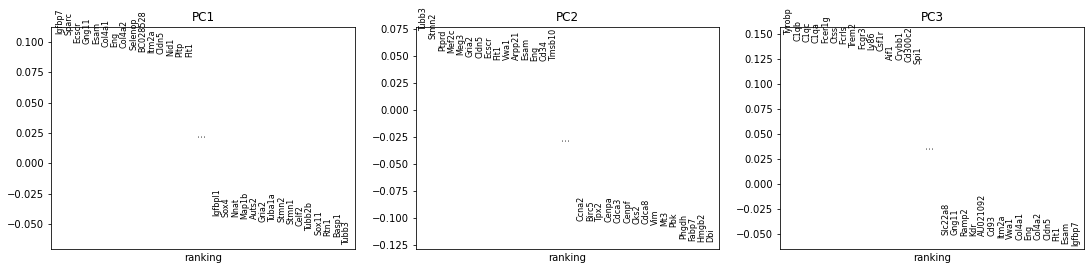

In [7]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca_loadings(adata)


/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


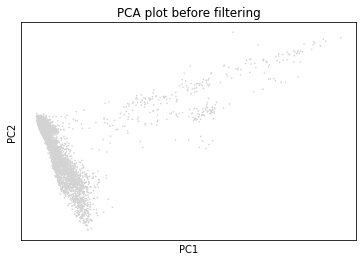

In [8]:
sc.pl.pca(adata,title='PCA plot before filtering',save='PCA_after_filtering.png')

# Step 2: Clustering

In [9]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

In [10]:
#UMAP
sc.tl.umap(adata)

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


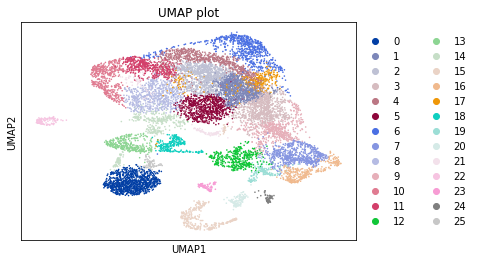

In [11]:
sc.pl.umap(adata,color='leiden',title='UMAP plot',save='UMAP_after_filtering.png')


/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


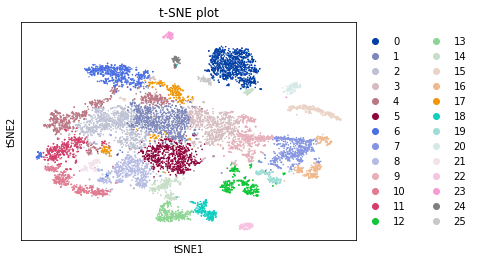

In [12]:
#t-SNE 
sc.tl.tsne(adata)
sc.pl.tsne(adata,color='leiden',title='t-SNE plot',save='tSNE_after_filtering.png')

# Step 3: Distinguishing genes

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


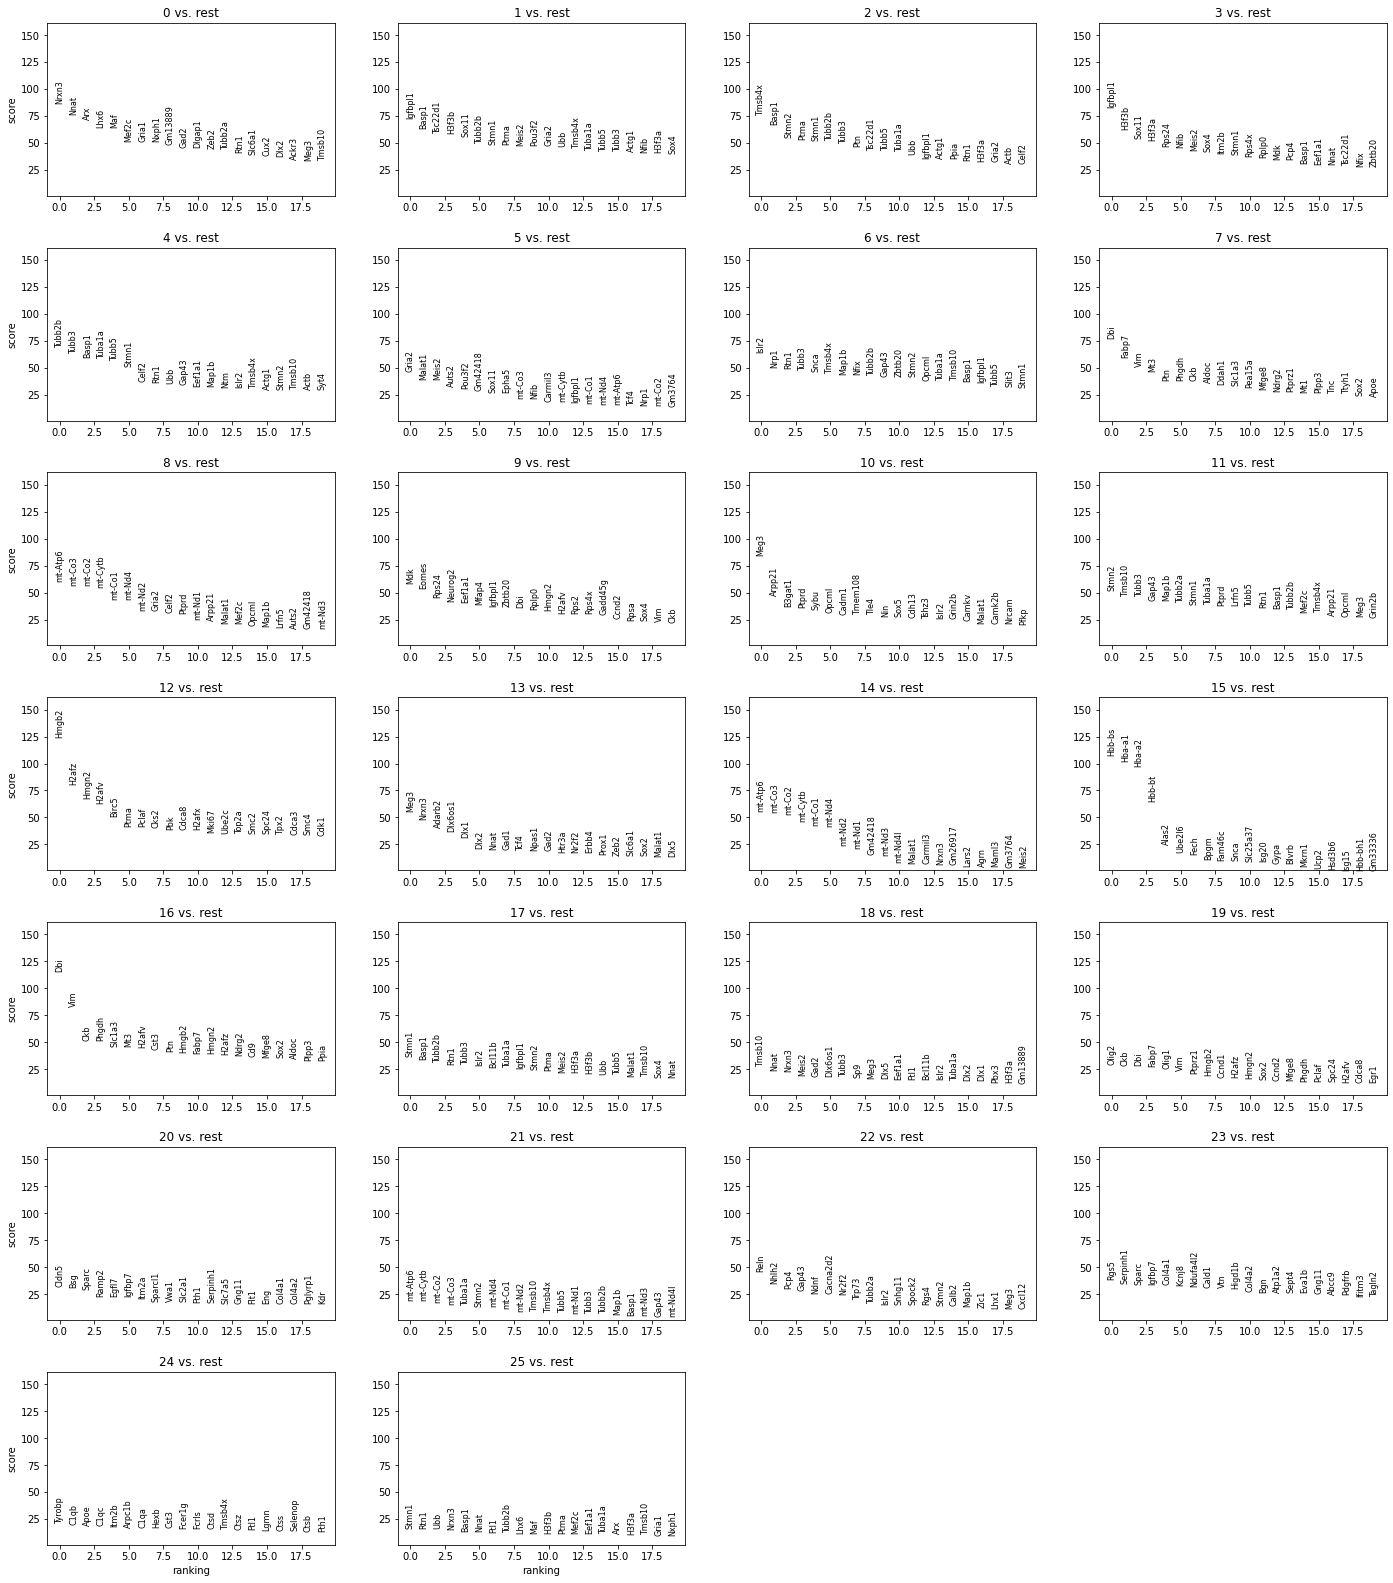

In [16]:
#t-test method
sc.tl.rank_genes_groups(adata,groupby="leiden",method='t-test')
sc.pl.rank_genes_groups(adata,n_genes=20,save='gene_ranking_ttest.png')


/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


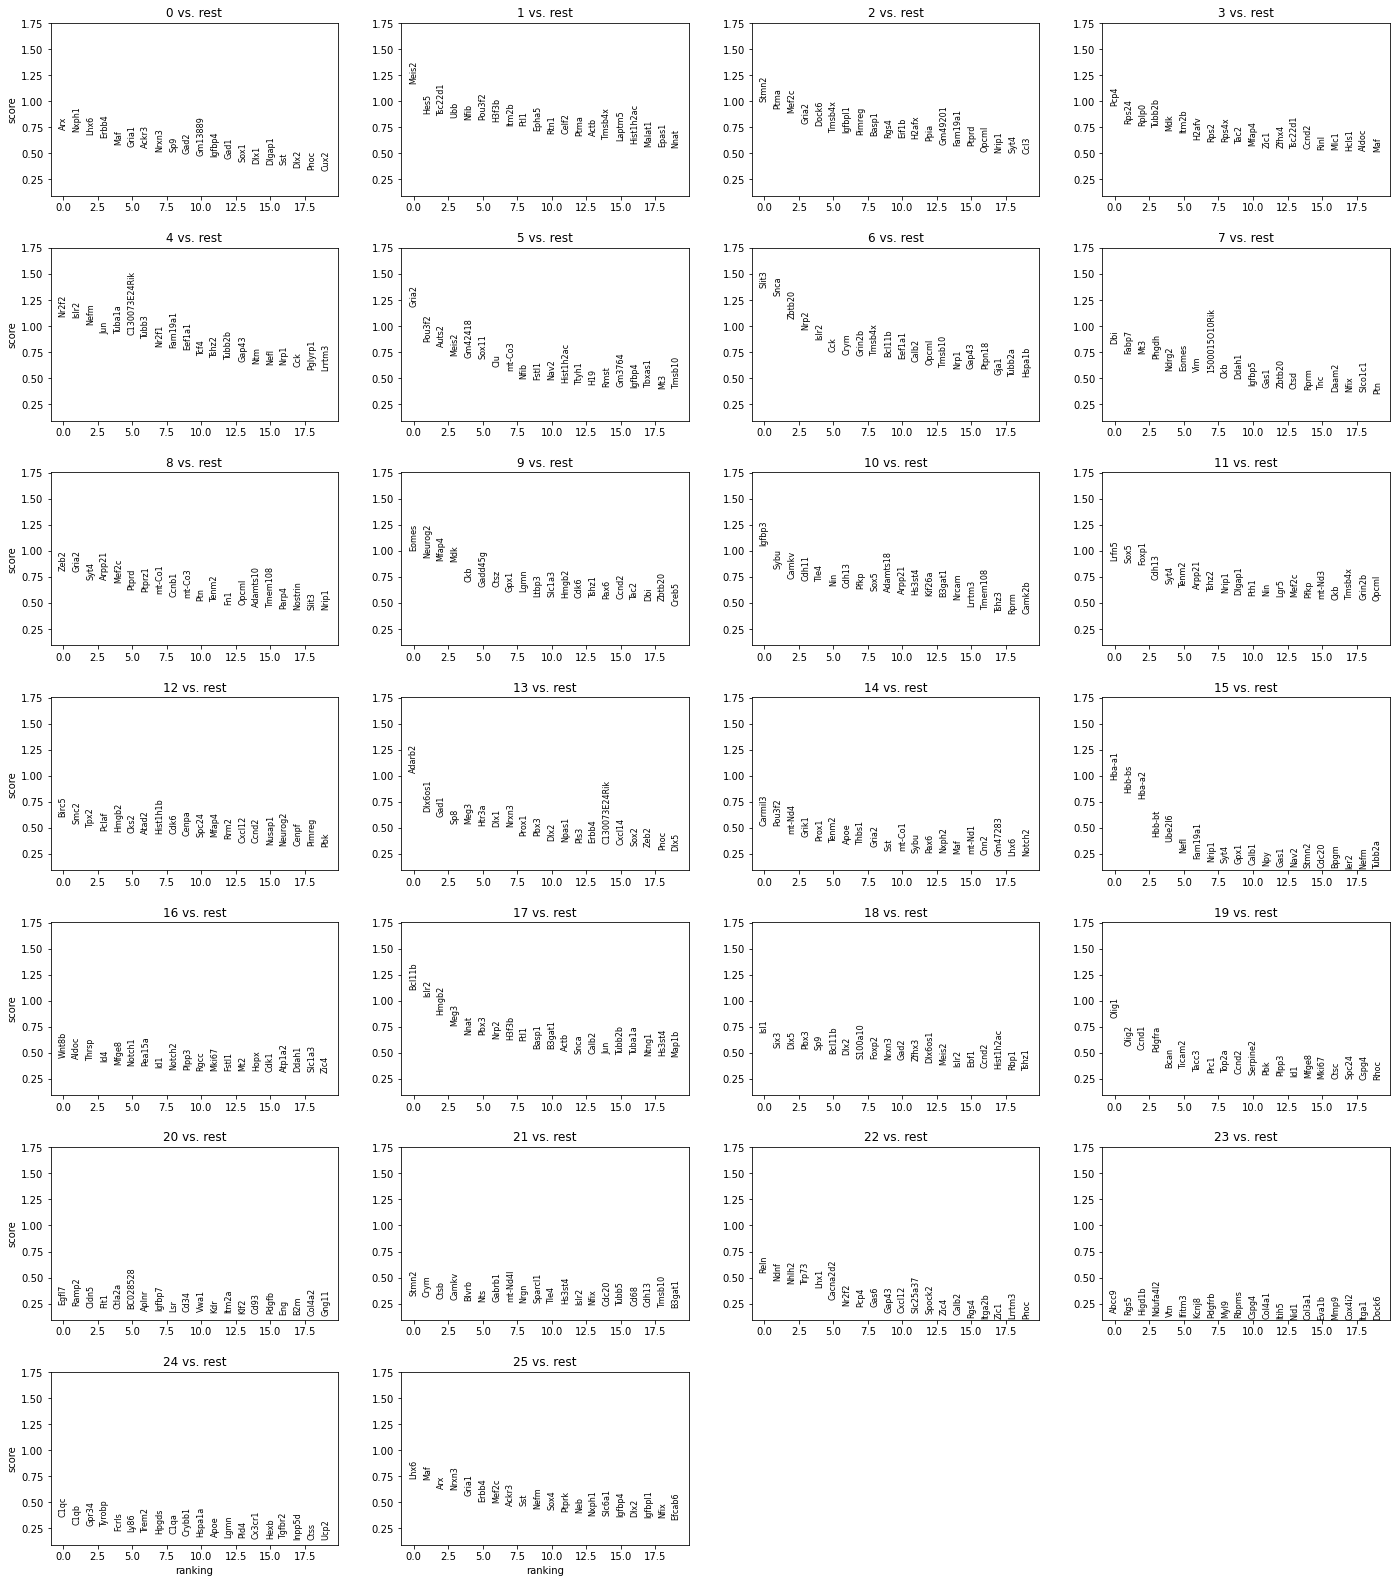

In [14]:
#regression method
sc.tl.rank_genes_groups(adata,groupby="leiden",method='logreg')
sc.pl.rank_genes_groups(adata,n_genes=20,save='gene_ranking_logreg.png')


# Step 5: Cell types?

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


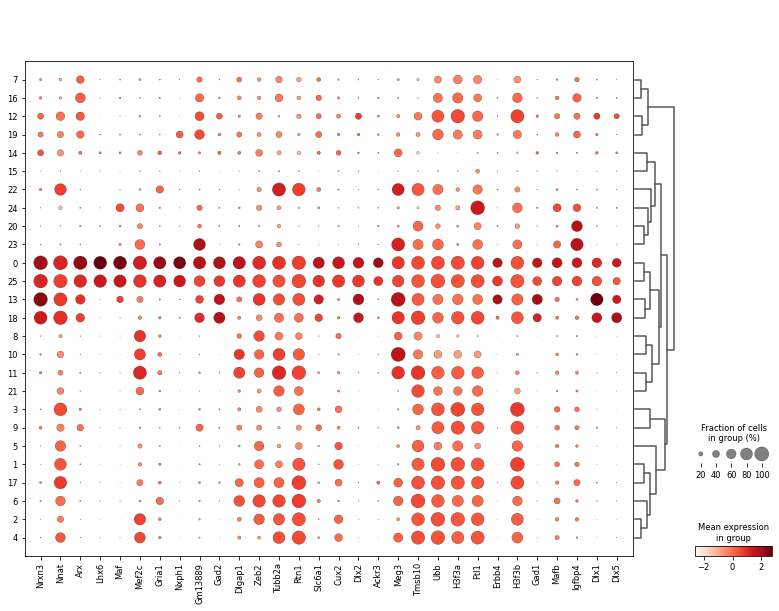

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


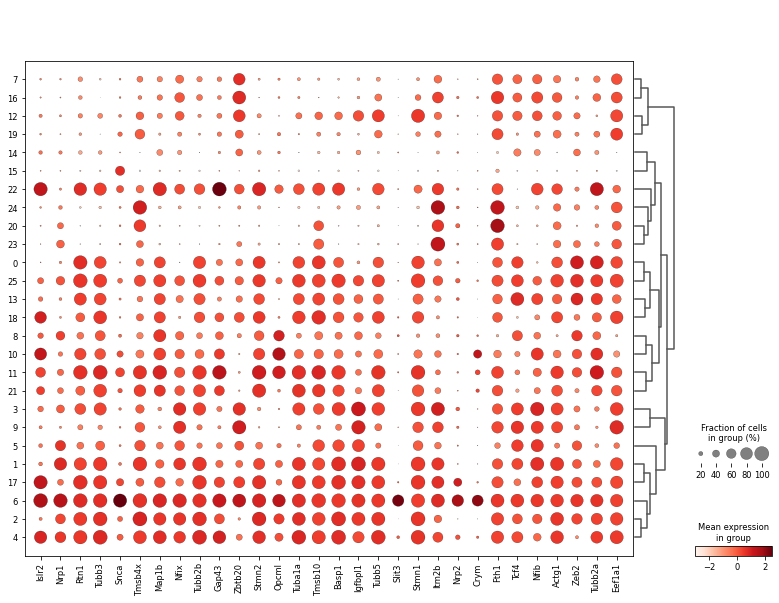

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


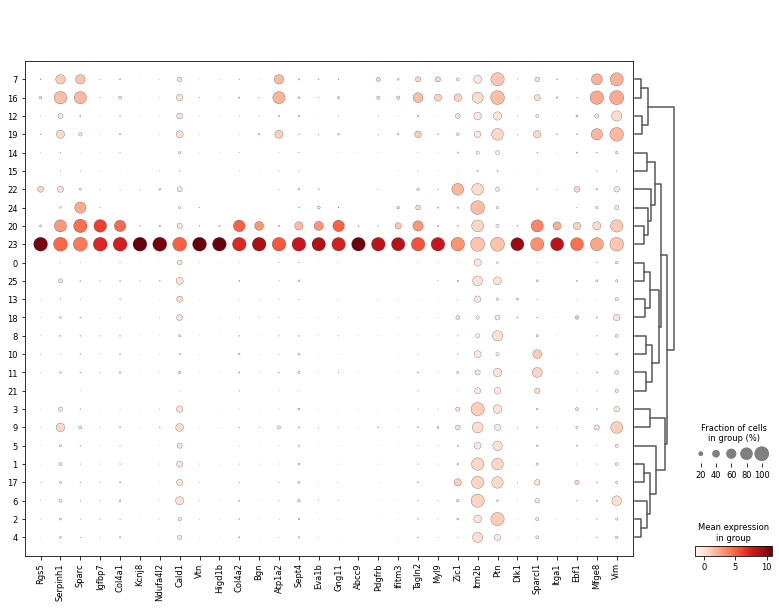

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


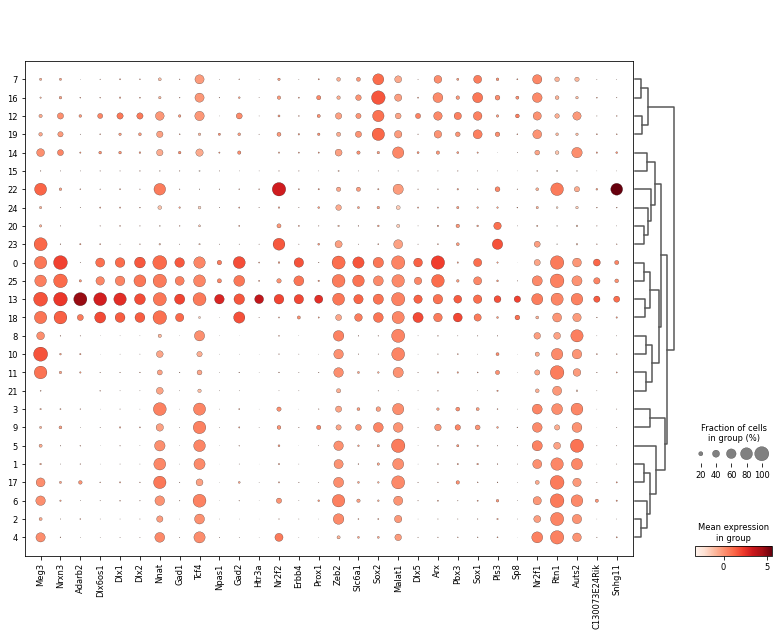

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


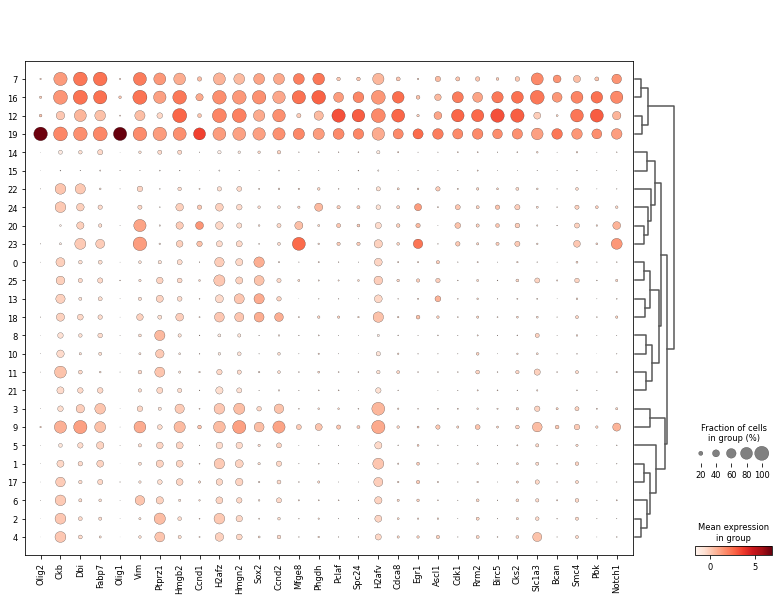

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


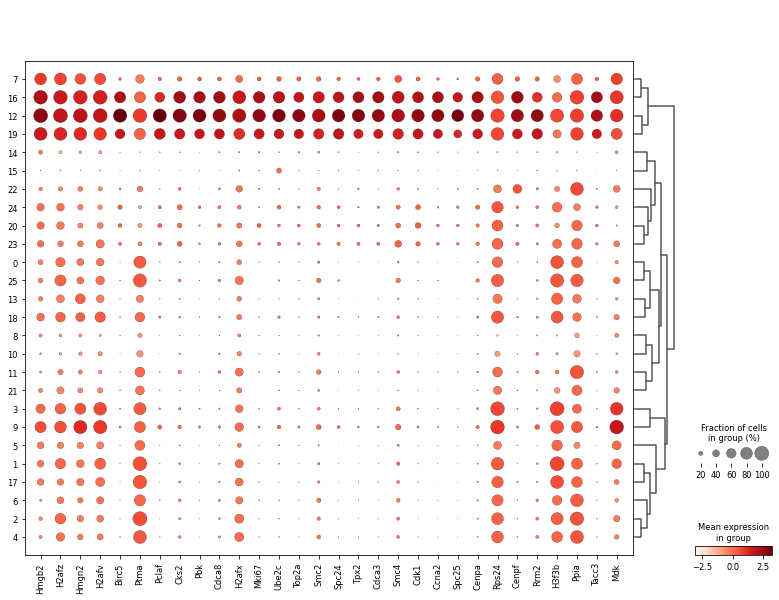

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


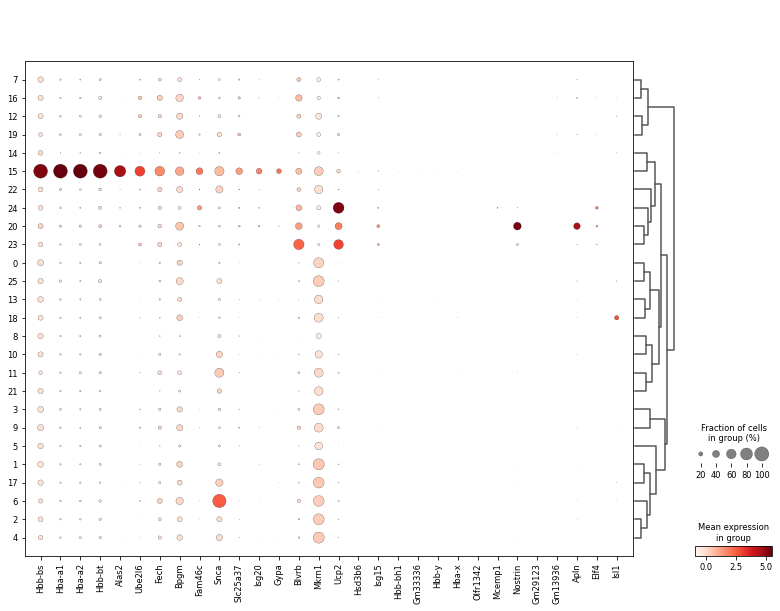

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


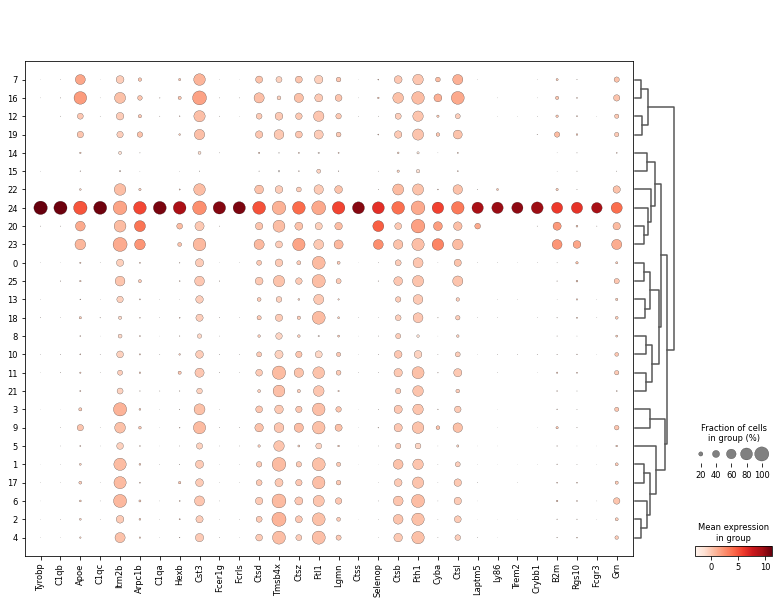

In [17]:
cells=['0','6','23','13','19','12','15','24']
for cell in cells:
    cell0 = sc.get.rank_genes_groups_df(adata, group=cell)
    markers = cell0['names'][0:30]
    sc.pl.dotplot(adata, markers, groupby="leiden", dendrogram=True,save=cell+'.png')

### cluster0 and cluster25
- Lhx6: LIM homeobox protein 6; Lhx6 expression marks MGE-progenitors and many MGE-derived neurons
- So they should be interneurons derived from MGE in cortical region.

### cluster6
- Islr2: LRR receptor, as an RGC receptor
- Cluster 6 should be RGCs

### cluster23
- KCNJ8 and ABCC9 jointly form an ATP/ADP-binding potassium channel, and they are identified as brain PC markers in mouse
- So the cluster 23 should be brain vascular mural cells

### cluster13
- canonical markers of vasoactive intestinal peptide (VIP) cells, including Htr3a, Npas1, and Adarb2
- so cluster 13 should be VIP cells

### cluster19
- OLIG1 specifically marks oligodendrocytes in human brain, which should be homogenuous in mice
- So, cluster 7 should be oligodendrocytes

### cluster12
- Hmgb2: High mobility group B family 1 (HMGB1) and HMGB2, HMG family proteins that function as transcriptional activators through the modulation of chromatin structure, have been assumed to play some role in the regulation of adult NSCs
- so Cluster 12 should be adult neuron stem cells

### cluster15
- many hba genes that are hemoglobin genes indicate the cells are derived from blood cells
- Alas2 and various hemoglobin subunits (Hba-a1, Hba-a2 and Hbb-bt) are erythrocyte marker
- so cluster 15 may be erythrocyte

### cluster24
- human AD brain slices and confirmed the enrichment of Tyrobp and several complement components (C1qA, C1qB, C1qC, and Clu)
- So cluster 24 should be Microglial 

In [18]:
new_cluster_names = [
    'MGE-derived coritcal interneuron', '1',
    '2', '3','4','5',' RGCs','7','8','9','10','11','adult NSC',
    'VIP cells', '14','erythrocyte','16','17','18','oligodendrocytes','20','21','22','brain vascular mural cells','Microglial','25']
adata.rename_categories('leiden', new_cluster_names)

/Users/xiangning/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


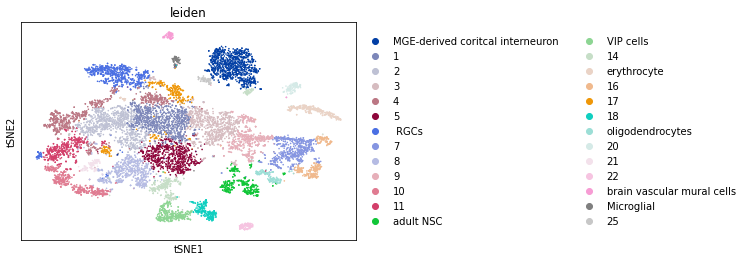

In [19]:
sc.pl.tsne(adata,color='leiden',save='tSNE_with_cluster_names.png')